# Exercise 8 - Robot Control

In this assignment, you will to implement a controller for a car-like robot to follow a desired path. The controller has two components, (i) Longitudinal Controller and (ii) Lateral Controller. Your task is to implement the two controllers individually and then combine them to perform the task of path following.  



## Simplified Ackermann / Bicycle Model

For this assignment, we will consider the simplified Ackermann model (or Bicycle model) for describing the kinematics of a car-like robot. The state of the car is described by $[x, y, \theta, v, \delta]$ where $x,y$ is the position, $\theta$ is the orientation, $v$ is the linear velocity, and $\delta$ is the steering angle of the vehicle. The controls $u$ are given by the $[a, \dot{\delta}]$ where $a$ is the linear acceleration and $\dot{\delta}$ is the steering rate of the vehicle.

<img src="ackermann_car_model.png" width="500">

In order for the wheels of the car to have rolling motion without any slipping, the steering angle must be $\delta = \tan^{-1}(\frac{d}{r})$. Here, $d$ is the distance between the rear and the front axle of the car (i.e. length of the vehicle) and $r$ is the distance to the instantaneous center of curvature (ICC). In addition, our robot must satisfy the following constraints:
1. $ v < 10 \,m/s $ 
2. $ |\delta| \leq \pi/3 \,rad\,(60\,deg)$
3. $ |\dot{\delta}| <  \leq 0.175\,rad/s\,(10\,deg/sec)$



In [1]:
import ex8 as ex
import numpy as np
import matplotlib.pyplot as plt
import math

# Initialze robot 
robot = ex.Robot()
robot.x = 1
robot.y = 3
robot.theta = np.pi/3
robot.v = 0
robot.delta = 0

# Pose of the robot before applying the control command
print('x:{:.2f}, y:{:.2f}, theta:{:.2f}, v:{:.2f}, delta:{:.2f}'.format(robot.x, robot.y, robot.theta, robot.v, robot.delta))

# Apply a control command
a = 1 # m/s
delta_dot = 0.1 # rad/s
dt = 1 #time period for which the command is applied
robot.apply_control(a, delta_dot, dt)

# Pose of the robot after applying the control command
print('x:{:.2f}, y:{:.2f}, theta:{:.2f}, v:{:.2f}, delta:{:.2f}'.format(robot.x, robot.y, robot.theta, robot.v, robot.delta))

x:1.00, y:3.00, theta:1.05, v:0.00, delta:0.00
x:1.50, y:3.87, theta:1.15, v:1.00, delta:0.10


## 8.1 Longitudinal Controller [3.0]

The goal of the longitudinal controller is ensure that the linear velocity $v$ of the vehicle is close to the desired velocity $v_{des}$. 

The robot follows velocity model that is linear in the control input $a$.

Implement a PID controller with appropriate gains $(K_P, K_D, K_I)$ such that $ |v - v_{des}| < 0.2\,m/s $ after intial convergence. 

Verify that your implementation is correct for some test input.

Hints:
1. Start with noise free control (by setting noisy_controls = False).
2. Tune the gains incrementally, i.e first set only $K_p$, then ($K_p,K_d$), and finally $(K_p, K_d, K_I)$.     

In [2]:
# Add code to test the PID controller

## 8.2 Lateral Controller [3.0]

The goal of the lateral controller is to ensure that the steering angle $\delta$ is set such that the vehicle intersects the desired path at a look-ahead distance $l_d$ according to the pure-pursuit strategy explained in the lecture.

<img src="pure_pursuit.png" width="500">

Implement a lateral controller with $l_d = 2\,m$. The length of the car is $d = 1\,m$. Verify that your implementation is correct for some test input.

In [3]:
# Implement the lateral controller which sets the steering angl

## 8.3 Path Following Task [4.0]

Once you complete the above two functions, implement the procedure to follow the desired path as accurately as possible. The desired path to be followed is a curve provided in the code snippet. The desired linear velocity 
is $v_{des} = 2\,m/s$. The robot starts at an initial pose $x_0 = [0, 3, \pi/3]$.

Implement the function which uses the longitudinal and lateral controllers to follow the path. Run the simulation upto time T = 100 seconds or until the end of trajectory is reached. Assume that the controllers provide input at 10 Hz (i.e dt = 0.1). Plot the actual trajectory followed by the robot and overlay it with the desired trajectory.

Hints:
1. You may use the function `calculate_lookahead_index` to compute the index of the lookahead point along the trajectory. 
2. You may also play with the lookahead distance parameter $L_d$ to obtain better tracking results.

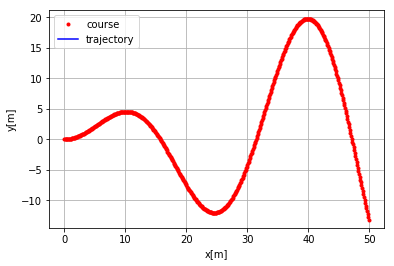

In [4]:
# Implement code to call the two implemented controllers to follow a dedired trajectory

# initialize robot
robot = ex.Robot()
robot.x = 0
robot.y = 3
robot.theta = np.pi/3
robot.v = 0
robot.delta = 0

# desired longitudinal velocity 
v_des = 2  # [m/s]

# desired trajectory
x_des = np.arange(0, 50, 0.1)
y_des = [math.sin(x_i / 5.0) * x_i / 2.0 for x_i in x_des]

# variables to record robot state
x_traj = [robot.x]
y_traj = [robot.y]
theta_traj = [robot.theta]
v_t = [robot.v]
delta_t = [robot.delta]

# set simulation time
T = 100
dt = 0.1 # 10Hz
t = 0

# main loop
while t < T:

    # TODO: compute control and update robot pose
    
    
    # update time
    t = t + dt
    
    # save varaibles for plotting
    x_traj.append(robot.x)
    y_traj.append(robot.y)
    theta_traj.append(robot.theta)
    v_t.append(robot.v)
    delta_t.append(robot.delta)
    
# Plot trajectory
plt.cla()
#ex.plot_arrow(robot.x, robot.y, robot.theta)
plt.plot(x_des, y_des, ".r", label="course")
plt.plot(x_traj, y_traj, "-b", label="trajectory")
plt.legend()
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.axis("equal")
plt.grid(True)
plt.show()